In [3]:
import sys
import numpy 
import pandas
import matplotlib 
import seaborn 
import scipy 
import sklearn  

print('Python:[]'.format(sys.version))
print('Numpy:[]'.format(numpy.__version__))
print('Pandas:[]'.format(pandas.__version__))
print('Matplotlib:[]'.format(matplotlib.__version__))
print('Seaborn:[]'.format(seaborn.__version__))
print('Scipy:[]'.format(scipy.__version__))
print('Sklearn:[]'.format(sklearn.__version__))

Python:[]
Numpy:[]
Pandas:[]
Matplotlib:[]
Seaborn:[]
Scipy:[]
Sklearn:[]


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
data = pd.read_csv('creditcard.csv')

In [9]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [10]:
print(data.shape)

(284807, 31)


In [11]:
print(data.describe)

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
9            9.0  -0.338262   1.119593  1.044367 -0.222187  0.499361   
10          10.0   1.449044  -1.176339  0.913860 -1.375667 -1.971383   
11          10.0   0.384978   0.616109 -0.874300 -0.094019  2.924584   
12          10.0   1.249999  -

In [12]:
data = data.sample(frac=0.1, random_state = 1)
print(data.shape)


(28481, 31)


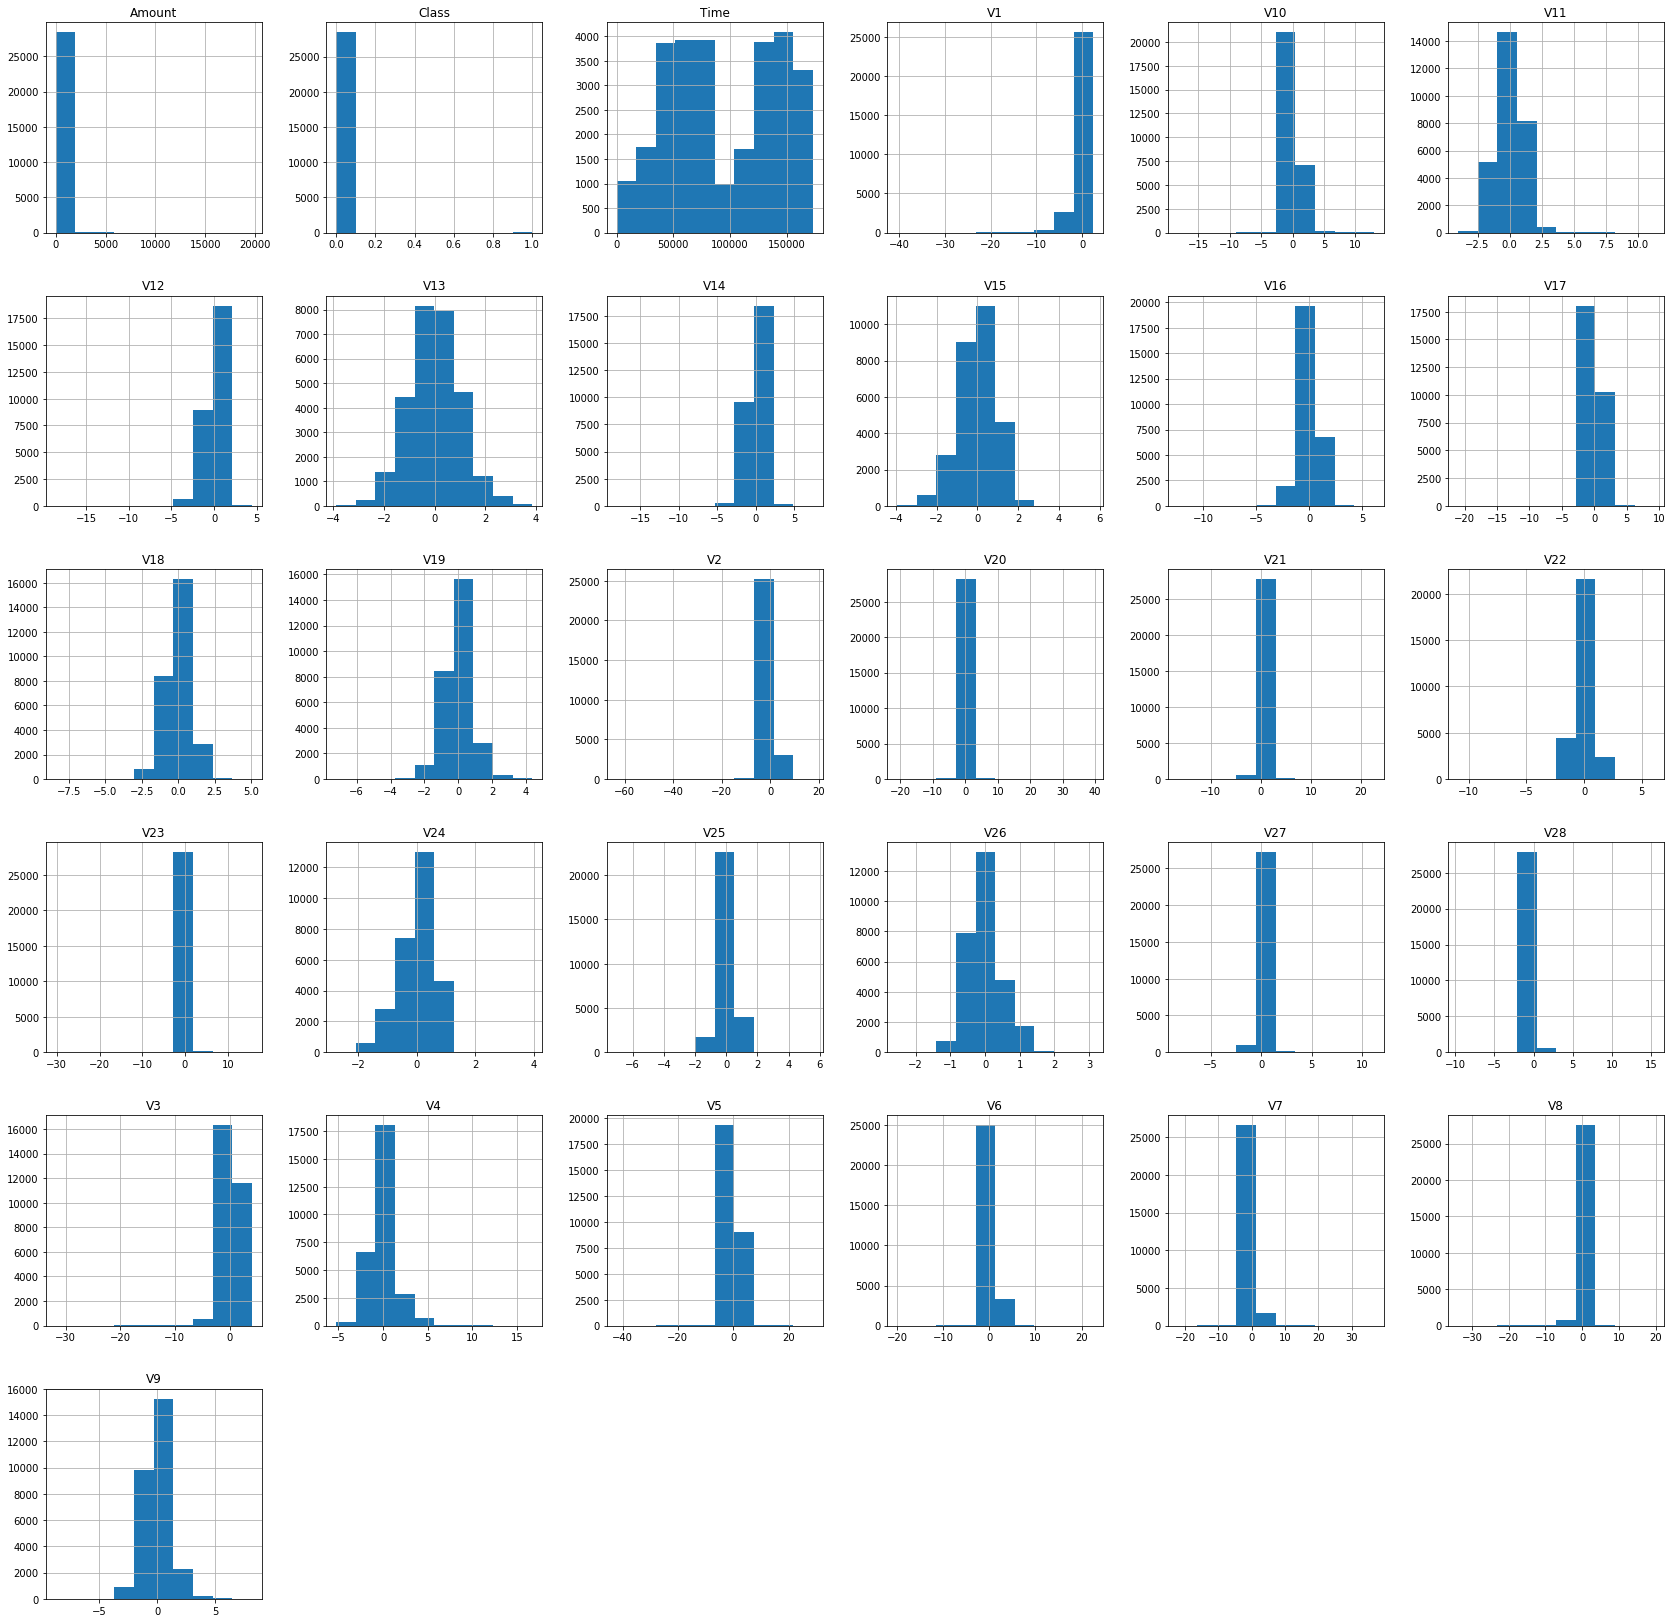

In [15]:
data.hist(figsize = (29, 29))
plt.show()

In [16]:
Fraud = data[data["Class"] == 1]
Valid = data[data["Class"] == 0]

In [22]:
outlier_fraction = len(Fraud) / float(len(Valid))
print(outlier_fraction)

print ('Fraud Cases: ()'.format(len(Fraud)))
print ('Valid Cases: ()'.format(len(Valid)))

0.0017234102419808666
Fraud Cases: ()
Valid Cases: ()


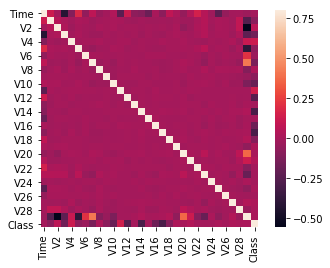

In [23]:
corrmat = data.corr()
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [39]:
columns = data.columns.tolist()

columns = [c for c in columns if c not in ["Class"]]

target = "Class"

x = data[columns]
y = data[target]

print(x.shape)
print(y.shape)

(28481, 30)
(28481,)


In [85]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


state = 1

classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(x),
                                             contamination = outlier_fraction, 
                                             random_state = state),
    
    "Local Outlier Factor": LocalOutlierFactor(
     n_neighbors = 20,
     contamination = outlier_fraction)
}

In [93]:
n_outliers = len(Fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):

    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(x)
        scores_pred = clf.negative_outlier_factor_
    
    else:
        clf.fit(x)
        scores_pred = clf.decision_function(x)
        y_pred = clf.predict(x)
        
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    
    n_errors =(y_pred != y).sum()
    
    print('{}:[]'.format(clf_name, n_errors))
    print(accuracy_score(y, y_pred))
    print(classification_report(y, y_pred))

C:\Users\Khan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Isolation Forest:[]
0.99750711000316
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28432
          1       0.28      0.29      0.28        49

avg / total       1.00      1.00      1.00     28481

Local Outlier Factor:[]
0.9965942207085425
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28432
          1       0.02      0.02      0.02        49

avg / total       1.00      1.00      1.00     28481

